In [1]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re
import numpy as np

import wandb
import json

from sklearn.manifold import TSNE

In [2]:
# api = wandb.Api()
# artifact_path = 'yudai22-/condition_matching/training_log:v3'
# artifact = api.artifact(artifact_path)

# run = artifact.logged_by()


# try:
#     config_dict = json.loads(run.config)
#     latent = config_dict["latent_num"]
#     print(latent)
# except json.JSONDecodeError:
#     # run.config が有効なJSON文字列でなかった場合の処理
#     print("エラー: run.config は有効なJSON形式ではありません。")
# except TypeError:
#     # run.config が文字列でなかった場合の処理 (念のため)
#     print("エラー: run.config は文字列型ではありません。")


# # latent = run.config["latent_num"]
# # print(latent)

# match = re.findall('/.*/', artifact_path)
# log_name = re.search(r"(training.*)", artifact_path).group()

# print(log_name)
# print(match[0][1:-1])

In [3]:
# all_region_latent = np.load(f"/home/cygnus/fujimoto/Cygnus-X_CAE/analysis/check_latent/latent_list/{match[0][1:-1]}/all/{log_name}_all_latent.npy")
# bubble_region_latent = np.load(f"/home/cygnus/fujimoto/Cygnus-X_CAE/analysis/check_latent/latent_list/{match[0][1:-1]}/bubble/{log_name}_bubble_latent.npy")
# view_all_region = np.load("/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/Binary_classification/data/processed_data/all_data_after_bubble_removal.npy")
# bubble_region = np.load("/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/Binary_classification/data/processed_data/slide_bubble.npy")

In [4]:
all_latent = np.load("/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/Binary_classification/analysis/check_latent/latent_list/cheating_model/data_latent.npy")
bubble_latent = np.load("/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/Binary_classification/analysis/check_latent/latent_list/cheating_model/bubble_data_latent.npy")
test_bubble_latent = np.load("/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/Binary_classification/analysis/check_latent/latent_list/cheating_model/test_bubble_data_latent.npy")
test_latent = np.load("/home/cygnus/fujimoto/Cygnus-X_Molecular_Cloud_Analysis/Binary_classification/analysis/check_latent/latent_list/cheating_model/test_data_latent.npy")

In [5]:
all_plus_bubble_latent = np.concatenate((all_latent, test_latent, bubble_latent, test_bubble_latent))

In [6]:
tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(all_plus_bubble_latent)

In [7]:
cluster_labels = ["non bubble"]*(len(all_latent)+len(test_latent)) + ["bubble"]*(len(bubble_latent)+len(test_bubble_latent))

In [8]:
all_val = len(all_latent)
bubble_val = len(bubble_latent)
test_val = len(test_latent)
test_bubble_val = len(test_bubble_latent)

In [9]:
a = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
b = 3
print(a[:b])
print(a[b:])

[0, 1, 2]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [10]:
test_cluster_labels = ["non bubble"]*test_val + ["bubble"]*test_bubble_val

In [11]:
test_digits_tsne = np.concatenate((digits_tsne[all_val:all_val+test_val], digits_tsne[all_val+test_val+bubble_val:]))

if len(test_digits_tsne) == test_val+test_bubble_val:
    print("Test data t-SNE: ", len(test_digits_tsne))
else:
    print("Wrong")

Test data t-SNE:  40


In [12]:
# plt.figure(figsize=(8, 8))

# # 散布図のプロット。c=cluster_labels でクラスターラベルに基づいて色を割り当てる
# scatter = plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], 
#                       c=test_cluster_labels, 
#                       cmap='viridis', # カラーマップの指定
#                       s=20, # ポイントのサイズ
#                       alpha=0.7) # 透明度

# # 凡例の追加
# legend1 = plt.legend(*scatter.legend_elements(), 
#                      title="Clusters", 
#                      loc="lower left", 
#                      bbox_to_anchor=(1.05, 0))
# plt.gca().add_artist(legend1)
# plt.legend()

# plt.title('t-SNE Visualization Colored by k-means Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()

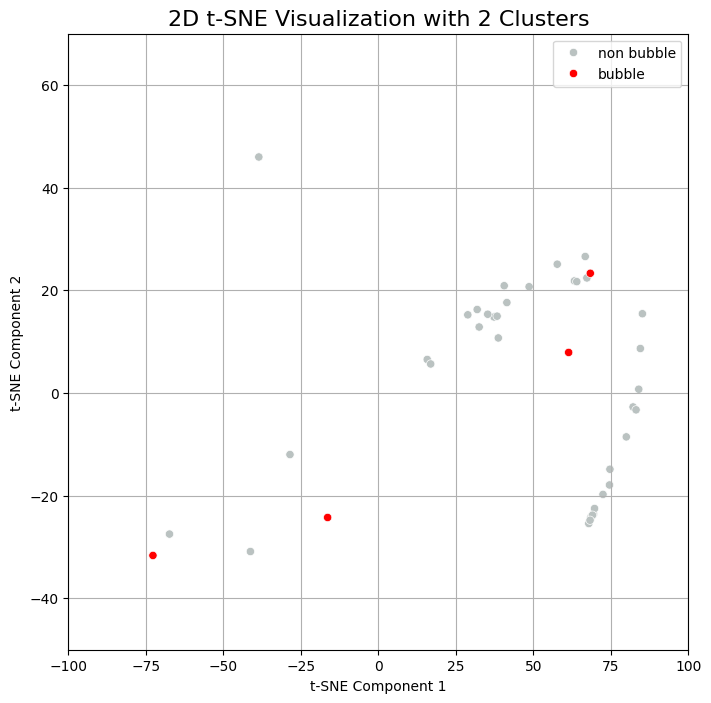

In [21]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=test_digits_tsne[:, 0], y=test_digits_tsne[:, 1], hue=test_cluster_labels, palette=["#bac2c1", "#ff0000"])
plt.title('2D t-SNE Visualization with 2 Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.xlim(-100, 100)  # x軸の範囲 (最小値, 最大値)
plt.ylim(-50, 70) # y軸の範囲 (最小値, 最大値)

plt.savefig("2D_t-SNE_Visualization_partial_test.png")
plt.show()

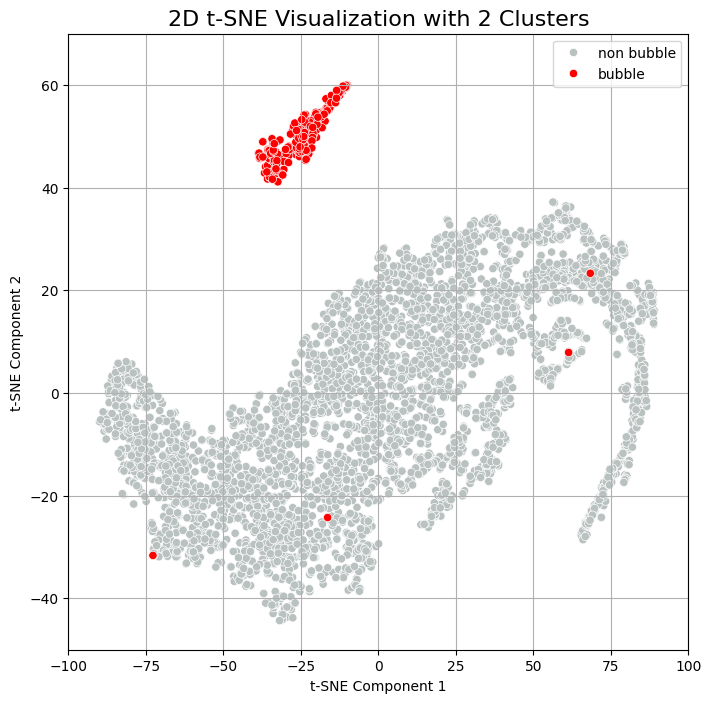

In [22]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=digits_tsne[:, 0], y=digits_tsne[:, 1], hue=cluster_labels, palette=["#bac2c1", "#ff0000"])
plt.title('2D t-SNE Visualization with 2 Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.xlim(-100, 100)  # x軸の範囲 (最小値, 最大値)
plt.ylim(-50, 70)

plt.savefig("2D_t-SNE_Visualization_partial.png")
plt.show()

In [15]:
tsne = TSNE(n_components=3, random_state=42)
digits_tsne_3d = tsne.fit_transform(all_plus_bubble_latent)

In [16]:
df_tsne_3d = pd.DataFrame({
    'tSNE_1': digits_tsne_3d[:, 0],
    'tSNE_2': digits_tsne_3d[:, 1],
    'tSNE_3': digits_tsne_3d[:, 2],
    'Cluster': cluster_labels # クラスタIDを文字列に変換
})

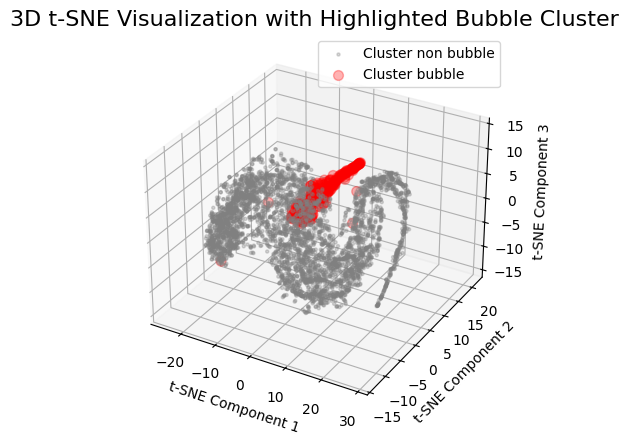

In [17]:
# %matplotlib widget

# グラフの準備
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d') # 👈 3Dプロット用の軸を作成

# クラスタごとに色を定義
cluster_colors = {
    'non bubble': 'grey',
    'bubble': 'red'
}

# 各クラスタの点のサイズを定義
# デフォルトサイズ
default_point_size = 5
# bubbleクラスタのサイズ
bubble_point_size = 50 # 👈 bubbleクラスタの点を大きくするサイズ（例: 50）

# 各クラスタの点をプロット
for cluster_id, color in cluster_colors.items():
    subset = df_tsne_3d[df_tsne_3d['Cluster'] == cluster_id]
    
    # クラスタIDが 'bubble' の場合のみ点のサイズを変更
    current_point_size = bubble_point_size if cluster_id == 'bubble' else default_point_size
    
    ax.scatter(
        subset['tSNE_1'],
        subset['tSNE_2'],
        subset['tSNE_3'],
        color=color,
        label=f'Cluster {cluster_id}',
        alpha=0.3,
        s=current_point_size # 👈 ここで条件によってサイズが変わる
    )

# タイトルと軸ラベルの設定
ax.set_title('3D t-SNE Visualization with Highlighted Bubble Cluster', fontsize=16)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# 凡例の表示
ax.legend()

# plt.savefig("3D_t-SNE_Visualization")
# plt.show()

In [18]:
formatted_bubble = np.round(bubble_region_latent[0], 0)
formatted_removal = np.round(all_region_latent[0], 0)
print(formatted_bubble)
print(formatted_removal)

NameError: name 'bubble_region_latent' is not defined